<a href="https://colab.research.google.com/github/ohi-there/3NM4-Dual-Numbers/blob/main/maoj27_researchproject_dualnumbers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
%pip install num-dual

Note: you may need to restart the kernel to use updated packages.


**DISCLAIMER:** A lot of the code was generated with ChatGPT and Gemini. I am not a professional.

# **Dual Numbers and Automatic Differentiation**
Automatic differentiation is an alternative way of computing derivatives, compared to symbolic differentiation learned in high school. It involves calculating the *value* of the derivative at a point directly. How is this possible?

## **Motivation for Dual Numbers**
Recall our typical approximation of a function $f(x)$ about $x=a$ with its Taylor series:
$$
f(x) = \sum_{k=0}^\infty \frac{f^{(k)}(a)}{k!} (x-a)^k = \frac{f(a)}{0!} + \frac{f'(a)}{1!}(x-a) + \frac{f''(a)}{2!}(x-a)^2 + \cdots
$$
This includes the exact values of the function at $a$, and its subsequent derivatives. Automatic Differentiation (AD) involves calculating the value of the derivative exactly - the second term $f'(a)$ sounds really like the value we are interested in.

If we want to calculate the derivative at a point $x_0$, we would want the term $f'(x_0)$. Consider the substition $x=x_0+\epsilon,a=x_0$:
$$
f(x_0+\epsilon) = \sum_{k=0}^\infty \frac{f^{(k)}(x_0)}{k!} \epsilon^k = \frac{f(x_0)}{0!} + \frac{f'(x_0)}{1!}\epsilon + \frac{f''(x_0)}{2!}\epsilon^2 + \cdots
$$
which we can extract $f'(x_0)$ if and only if all the higher-order terms go to zero; ie. $\epsilon\neq 0, \epsilon^2=0$ (if that is satisfied, any other higher power is also equal to zero).

And thus is the definition of dual numbers; ie. a number
$$
a + b \epsilon \qquad \text{ where }\epsilon \neq 0, \epsilon^2 =0
$$
that results in the exact numerical value of the derivative,
$$
f(x_0+\epsilon) = f(x_0) + f'(x_0) \epsilon
$$
[source (pdf)](https://tomrocksmaths.com/wp-content/uploads/2024/07/tom_rocks_2-4-syed-daniyal-qadri-student.pdf)

(Side note: Doesn't this look very similar to a complex number, just with a different definition?)

(Second side note: if you isolate for $f'(x_0)$, what formula pops out? Is this familiar?)

## **Rules of Dual Numbers**
If we have two dual numbers $a + b \epsilon, c + d \epsilon$, then we can add or multiply them:
$$
(a + b \epsilon) + (c + d \epsilon) = (a + c) + (b + d) \epsilon
$$
and
$$
(a + b \epsilon)(c + d \epsilon) = ac + (ad + bc)\epsilon + bd \epsilon^2 = ac + (ad + bc)\epsilon
$$

We implement this number system, where if $f$ is any function (analytic or not!), its **dual extension** $\tilde{f}$ is given by
$$
\tilde{f}(a+b\epsilon) = f(a) + f'(a) b \epsilon
$$
and our typical elementary functions (think $\sin x, \cos x, e^x, \ln x, x^n$) obey the rules of AD:
$$
\begin{align*}
(a+b\epsilon)^n &= a^n + na^{n-1} b \epsilon \\
\sin(a+b\epsilon) &= \sin a + b \epsilon \cos a \\
\cos(a+b\epsilon) &= \cos a - b \epsilon \sin a \\
\tan(a+b\epsilon) &= \tan a + b \epsilon \sec^2 a \\
e^{a+b\epsilon} &= e^a + e^a b \epsilon \\
\ln(a+b\epsilon) &= \ln(a) + \frac{b \epsilon}{a} \\
|a+b\epsilon| &= |a| + b \epsilon \text{ sgn}(a)
\end{align*}
$$

where if we have the elementary functions, their compositions obey the typical rules you'd assume are true with regards to addition, multiplication, and composition (notation $f \circ g$ means $f(g(x))$) :
$$
\begin{align*}
\widetilde{f + g} &= \tilde{f}+\tilde{g} \\
\widetilde{f \cdot g} &= \tilde{f} \cdot \tilde{g} \\
\widetilde{f \circ g} &= \tilde{f} \circ \tilde{g} \\
\end{align*}
$$
In general, our main idea will be to pass the value of interest $a$ and have $b=1$ to extract the derivative.

See [Appendix A](#appendix_a) for some rigorous derivations, if interested.


### **Example**
Consider the function $f(x) = x^2\sin(x)$, and calculate the derivative at $x=5$. Then we evalulate $f(5+\epsilon)$:
$$
\begin{align*}
f(5 + \epsilon) &= (5 + \epsilon)^2 \sin(5 + \epsilon) \\
&= (25 + 10 \epsilon) (\sin(5) + \epsilon \cos(5)) \\
&= 25 \sin 5 + (25 \cos 5 + 10 \sin 5)\epsilon + \underbrace{10 \cos (5) \epsilon^2}_{\text{0 by definition}} \\
&= \underbrace{25 \sin 5}_{f(5)} + \underbrace{(25 \cos 5 + 10 \sin 5)}_{f'(5)}\epsilon
\end{align*}
$$
The function evaluation and its derivative at that point pop out!

## **Higher Dimensional Gradients with Hyper-Dual Numbers**
This approach readily generalizes to multiple dimensions. For example, given the function
$$f(x,y)=\sin(x)\sqrt{y}$$
We can evaluate with more generalized $\epsilon$ known as Hyper-Dual numbers
$$f(x_0+\epsilon_x,y_0+\epsilon_y) \text{ where } \epsilon_x^2 = \epsilon_y^2 = 0, \epsilon_x \epsilon_y \neq 0 $$
which returns our derivatives when evaluated (recalling our derivative rules from above):
$$
\begin{align*}
f(x_0+\epsilon_x,y_0+\epsilon_y) &=\sin(x_0 + \epsilon_x)\sqrt{y_0 + \epsilon_y} \\
&= \bigg[\sin(x_0) + \epsilon_x \cos(x_0) \bigg] \bigg[y_0^{1/2} + \frac{1}{2} y_0^{-1/2} \epsilon_y \bigg] \\
&= \underbrace{\sin(x_0) \sqrt{y_0}}_{f(x_0,y_0)} + \underbrace{\cos(x_0) \sqrt{y_0}}_{\frac{\partial}{\partial x} f(x_0,y_0)} \epsilon_x + \underbrace{\frac{1}{2\sqrt{y_0}} \sin(x_0)}_{\frac{\partial}{\partial y} f(x_0,y_0)} \epsilon_y + \underbrace{\frac{1}{2\sqrt{y_0}} \cos(x_0)}_{\frac{\partial^2}{\partial x \partial y} f(x_0,y_0)} \epsilon_x \epsilon_y \\
\end{align*}
$$

(Note: If you wanted to extract each individual partial derivative with regular dual numbers, you would need to pass in first $f(x_0 + \epsilon, y_0)$, then pass through $f(x_0,y_0+\epsilon)$.)

The elements of the gradient
$$
\nabla f(\vec{x}) = \left\langle \frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2}, \cdots, \frac{\partial f}{\partial x_n} \right\rangle
$$
are simply the coefficients to each $\epsilon_{x_i}$. The mixed higher-order derivatives will be the coefficients to multiples of $\epsilon_i\epsilon_j$. In math notation,
$$
f(\vec{x}_0 + \epsilon) = f(\vec{x}_0) + \nabla f(\vec{x}_0) \epsilon
$$

We can extend this idea to a system of equations
$$
\vec{F}(\vec{x}) = \begin{bmatrix}
 f_1(\vec{x}) \\ f_2(\vec{x}) \\ \vdots \\ f_m(\vec{x})
\end{bmatrix}
$$
and its generalized derivative, otherwise known as the **Jacobian** $\vec{J}$, is obtained by passing through a series of seeded dual numbers

$$
\vec{x}_j = \vec{x}_0 + \vec{\epsilon}_j
$$

where $\epsilon_j^2 = 0$, and $\epsilon_i \epsilon_j = 0 \; \; \forall \; \; i \neq j$, then the output has the $j$-th column of the Jacobian as the coefficient for $\epsilon_j$:
$$
\vec{F}(\vec{x}_j) =\vec{F}(\vec{x}_0) + J_j(\vec{x}_0) \epsilon_j
$$

$$
\vec{J} = \begin{vmatrix}
\frac{\partial f_1}{x_1} & \frac{\partial f_1}{\partial x_2}
\end{vmatrix}
$$

If your input vector $\vec{x}$ has $n$ inputs, then the complexity is simply $\mathcal{O}(n)$.

This process (of substituting in different $\epsilon$, passing them through the function, and extracting the derivative) is called **forward-mode automatic differentiation**. We use regular dual numbers for the Jacobian (where the rule $\epsilon_i \epsilon_j = 0 \; \; \forall \; \; i \neq j$ holds), and hyper-dual numbers for the Hessian (where $\epsilon_i \epsilon_j \neq 0 \; \; \forall \; \; i \neq j$ ).

[source (pdf)](https://www.research-collection.ethz.ch/server/api/core/bitstreams/82e1a27d-f913-45c7-8af1-e30fd3e260e3/content)

## **Why Dual Numbers?**
Consider the different numerical methods for calculating derivatives:
| **Method**          | **Accuracy**       | **Ease of Implementation** | **Complexity**   |
|---------------------|--------------------|----------------------------|------------------|
| Forward Difference  | $\mathcal{O}(h)$   | easy to implement          | 2 function calls |
| Backward Difference | $\mathcal{O}(h)$   | easy to implement          | 2 function calls |
| Central Difference  | $\mathcal{O}(h^2)$ | easy to implement          | 2 function calls |

Or the good old analytic method of calulating the derivative (symbolically or by hand). It is easy to see that analytical, finite, and symbolic differentiation all struggle with either increasing complexity, automation, error, or higher dimensions. AD is quick, generalizes to higher dimensions well, and is exact!
| **Technique**                    | **Advantage(s)**                                                          | **Drawback(s)**                                                                                                                                                                           |
|----------------------------------|---------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Hand-coded analytical derivative | Exact and often fastest method.                                           | Time consuming to code, error prone, and not applicable to problems with implicit solutions. Not automated.                                                                               |
| Finite differentiation           | Easy to code.                                                             | Subject to floating point precision errors and slow, especially in high dimensions, as the method requires at least D evaluations, where D is the number of partial derivatives required. |
| Symbolic differentiation         | Exact, generates symbolic expressions.                                    | Memory intensive and slow. Cannot handle statements such as unbounded loops.                                                                                                              |
| Automatic differentiation        | Exact, speed is comparable to hand-coding derivatives, highly applicable. | Needs to be carefully implemented, although this is already done in several packages.                                                                                                     |

## **Implementing Dual Numbers**

### **1. Complicated Functions**
Consider the function
$$ f(x) = \frac{e^x}{\sqrt{\sin^3(x) + \cos^3(x)}} = e^x (\sin^3(x) + \cos^3(x))^{-\frac{1}{2}} $$
which has no real application, but is good for demonstration. Its derivative and second derivatives are:
$$f'(x) = \frac{\mathrm{e}^{x} \left(2 \sin^{3}\left(x\right) - 3 \cos\left(x\right) \sin^{2}\left(x\right) + 3 \cos^{2}\left(x\right) \sin\left(x\right) + 2 \cos^{3}\left(x\right)\right)}{2 \left(\sin^{3}\left(x\right) + \cos^{3}\left(x\right)\right)^{\frac{3}{2}}}
$$
and
$$
f''(x) = \frac{\mathrm{e}^{x} \left(10 \sin^{6}\left(x\right) - 24 \cos\left(x\right) \sin^{5}\left(x\right) + 27 \cos^{2}\left(x\right) \sin^{4}\left(x\right) - 34 \cos^{3}\left(x\right) \sin^{3}\left(x\right) + 3 \cos^{4}\left(x\right) \sin^{2}\left(x\right) + 10 \cos^{6}\left(x\right)\right)}{4 \left(\sin^{3}\left(x\right) + \cos^{3}\left(x\right)\right)^{\frac{5}{2}}}
$$

We implement differentiation at $x=1.5$ with
1. Analytical (hard-coding the derivative)
2. Dual numbers
3. Central difference
4. Symbolic differentiation

In [90]:
import num_dual as nd
import numpy as np
import time
import sympy

### DEFINING THE FUNCTIONS
def f(x):
    return np.exp(x) / np.sqrt(np.sin(x)**3 + np.cos(x)**3)

def f_prime(x):
    num = np.exp(x) * (
        2*np.sin(x)**3
        - 3*np.cos(x)*np.sin(x)**2
        + 3*np.cos(x)**2*np.sin(x)
        + 2*np.cos(x)**3
    )
    den = 2 * (np.sin(x)**3 + np.cos(x)**3)**(1.5)
    return num / den

def f_double_prime(x):
    num = np.exp(x) * (
        10*np.sin(x)**6
        - 24*np.cos(x)*np.sin(x)**5
        + 27*np.cos(x)**2*np.sin(x)**4
        - 34*np.cos(x)**3*np.sin(x)**3
        + 3*np.cos(x)**4*np.sin(x)**2
        + 10*np.cos(x)**6
    )
    den = 4 * (np.sin(x)**3 + np.cos(x)**3)**(2.5)
    return num / den

x_val = 1.5

### ANALYTICAL

start_time = time.perf_counter()
f_val = f(x_val)
df_val = f_prime(x_val)
d2f_val = f_double_prime(x_val)
end_time = time.perf_counter()

execution_time_analytical = end_time - start_time

### DUAL NUMBERS
start_time = time.perf_counter()
f_val_nd, df_val_nd, d2f_val_nd = nd.second_derivative(f, x_val)
end_time = time.perf_counter()

execution_time_num_dual = end_time - start_time

### CENTRAL DIFFERENCE
h = 1e-6 # Appropriate small step size

start_time = time.perf_counter()

# Compute f(x) at x_val
f_val_cd = f(x_val)

# Central difference for first derivative
df_val_cd = (f(x_val + h) - f(x_val - h)) / (2 * h)

# Central difference for second derivative
d2f_val_cd = (f(x_val + h) - 2 * f(x_val) + f(x_val - h)) / (h**2)

end_time = time.perf_counter()

execution_time_central_diff = end_time - start_time

### SYMBOLIC
# 1. Import the sympy library and define a symbolic variable x
x = sympy.symbols('x')

# 2. Define the function f(x) symbolically
f_sym = sympy.exp(x) / sympy.sqrt(sympy.sin(x)**3 + sympy.cos(x)**3)

# 3. Record the start time
start_time = time.perf_counter()

# 4. Compute the first derivative
f_prime_sym = sympy.diff(f_sym, x)

# 5. Compute the second derivative
f_double_prime_sym = sympy.diff(f_prime_sym, x)

# 6. Convert symbolic functions into numerical functions
f_lambdify = sympy.lambdify(x, f_sym, 'numpy')
f_prime_lambdify = sympy.lambdify(x, f_prime_sym, 'numpy')
f_double_prime_lambdify = sympy.lambdify(x, f_double_prime_sym, 'numpy')

# 7. Compute numerical values at x=1.5
f_val_sym = f_lambdify(x_val)
df_val_sym = f_prime_lambdify(x_val)
d2f_val_sym = f_double_prime_lambdify(x_val)

# 8. Record the end time
end_time = time.perf_counter()

# 9. Calculate the total execution time
execution_time_symbolic = end_time - start_time

print("\n====================  DERIVATIVE METHOD COMPARISON  ====================\n")
print("Method\t\t\tf(x)\t\tf'(x)\t\tf''(x)\t\tTime (s)")
print("------------------------------------------------------------------------------------")
print(f"Analytical\t\t{f_val:.8f}\t{df_val:.8f}\t{d2f_val:.8f}\t{execution_time_analytical:.6e}")
print(f"NumDual\t\t\t{f_val_nd:.8f}\t{df_val_nd:.8f}\t{d2f_val_nd:.8f}\t{execution_time_num_dual:.6e}")
print(f"Central Diff\t\t{f_val_cd:.8f}\t{df_val_cd:.8f}\t{d2f_val_cd:.8f}\t{execution_time_central_diff:.6e}")
print(f"Symbolic\t\t{f_val_sym:.8f}\t{df_val_sym:.8f}\t{d2f_val_sym:.8f}\t{execution_time_symbolic:.6e}")
print("====================================================================================\n")



====================  DERIVATIVE METHOD COMPARISON  ====================

Method			f(x)		f'(x)		f''(x)		Time (s)
------------------------------------------------------------------------------------
Analytical		4.49778005	4.05342789	9.46307368	1.398001e-04
NumDual			4.49778005	4.05342789	9.46307368	9.760004e-05
Central Diff		4.49778005	4.05342789	9.46531742	1.499001e-04
Symbolic		4.49778005	4.05342789	9.46307368	1.286180e-02



Note that:
- The function values are all the same
- The first derivative values are all the same
- The second derivative values are the same EXCEPT with CD
- Time taken is generally relatively short; symbolic is a lot longer because it needs to manually differentiate. NumDual is the fastest on average, but not by too much.

See [Appendix B](#appendix_b) for a more rigorous comparison of the methods, if interested.


### **2. CG Optimization**

This code examins the Lennard-Jones 12-6 potential, which is given by

$$
U_{LJ}(r) = 4 \epsilon \sum_{i<j} \bigg[\left( \frac{\sigma}{r_{ij}} \right)^{12} + \left( \frac{\sigma}{r_{ij}} \right)^6\bigg]
$$

and normalized by setting $\epsilon, \sigma=1$. This code uses the **same method** (in different functions) but by using a *different* gradient method (either with FD or the ```num_dual``` method) to compute an optimal configuration.

**Note:** An initial guess is SUPER SUPER important here! Replace the initial condition with a random arrangement in the vicinity, and your solver falls into a local minima and can't get out. Launching multiple minimizers can work, but then you'd be better off using another method (like Amoeba or particle swarm).

In [31]:
# N-particle Lennard-Jones cluster minimization with dual vs FD CG
import numpy as np
import time
from num_dual import gradient
import plotly.graph_objects as go
from itertools import combinations

# -------------------------
# User settings
# -------------------------
N_PARTICLES = 6  # adjust as needed
DIM = 3
N_VARS = N_PARTICLES * DIM

epsilon = 1.0      # LJ depth
sigma = 1.0        # particle size
REG_EPS = 1e-2     # numerical regularization

CG_MAX_STEPS = 500
CG_TOL = 1e-6
MAX_STEP = 0.02     # max displacement per CG step

# Isosurface grid
GRID_N = 36
PADDING = 2.0

# -------------------------
# Dual -> float conversion
# -------------------------
def to_float_array(x):
    return np.array([float(v) for v in np.asarray(x).ravel()], dtype=float).reshape(np.asarray(x).shape)

# -------------------------
# Lennard-Jones potential
# -------------------------
def lennard_jones_flat(x):
    x_arr = np.asarray(x, dtype=object).ravel()
    positions = x_arr.reshape(N_PARTICLES, DIM)
    U = 0
    for i in range(N_PARTICLES):
        for j in range(i+1, N_PARTICLES):
            rij = positions[i] - positions[j]
            r2 = (rij*rij).sum()
            r = (r2 + REG_EPS)**0.5
            inv_r6 = (sigma / r)**6
            inv_r12 = inv_r6*inv_r6
            U += 4*epsilon*(inv_r12 - inv_r6)
    return U

# -------------------------
# Dual-number CG optimizer
# -------------------------
def optimize_dual_cg_stable(x0, max_steps=CG_MAX_STEPS, tol=CG_TOL, max_step=MAX_STEP):
    x = np.asarray(x0, dtype=object).ravel()
    g = np.asarray(gradient(lennard_jones_flat, x)[1], dtype=object).ravel() ### NUM_DUAL STEP
    d = -g.copy()
    g_norm = np.sqrt((g*g).sum())

    for step in range(max_steps):
        if float(g_norm) < tol:
            break
        alpha = 1.0
        f0 = float(lennard_jones_flat(x))
        while True:
            dx = alpha*d
            dx_norm = np.sqrt((dx*dx).sum())
            if dx_norm > max_step:
                dx = dx / dx_norm * max_step
            x_new = x + dx
            f_new = float(lennard_jones_flat(x_new))
            if f_new < f0 or alpha < 1e-8:
                break
            alpha *= 0.5
        x = x_new
        g_new = np.asarray(gradient(lennard_jones_flat, x)[1], dtype=object).ravel()
        beta = ((g_new*g_new).sum() / (g*g).sum())
        d = -g_new + beta*d
        g = g_new
        g_norm = np.sqrt((g*g).sum())
    return x

# -------------------------
# FD gradient
# -------------------------
def fd_gradient(f, x, h=1e-4):
    x = np.asarray(x, dtype=float).ravel()
    n = x.size
    g = np.zeros(n, dtype=float)
    for i in range(n):
        xp = x.copy(); xp[i] += h
        xm = x.copy(); xm[i] -= h
        g[i] = (f(xp) - f(xm)) / (2*h)
    return g

# -------------------------
# FD CG optimizer
# -------------------------
def optimize_fd_cg(x0, max_steps=CG_MAX_STEPS, tol=CG_TOL, max_step=MAX_STEP):
    x = np.asarray(x0, dtype=float).ravel()
    g = fd_gradient(lennard_jones_flat, x)
    d = -g.copy()
    g_norm = np.linalg.norm(g)
    for step in range(max_steps):
        if g_norm < tol:
            break
        alpha = 1.0
        f0 = lennard_jones_flat(x)
        while True:
            dx = alpha*d
            dx_norm = np.linalg.norm(dx)
            if dx_norm > max_step:
                dx = dx / dx_norm * max_step
            x_new = x + dx
            f_new = lennard_jones_flat(x_new)
            if f_new < f0 or alpha < 1e-8:
                break
            alpha *= 0.5
        x = x_new
        g_new = fd_gradient(lennard_jones_flat, x)
        beta = np.dot(g_new, g_new) / np.dot(g, g)
        d = -g_new + beta * d
        g = g_new
        g_norm = np.linalg.norm(g)
    return x

# -------------------------
# Geometric + perturbation initialization for small N
# -------------------------
def initialize_positions(N):
    np.random.seed(0)
    positions = np.zeros((N, DIM))
    if N == 4:
        # tetrahedron
        a = 1.0
        positions = np.array([
            [ a,  a,  a],
            [-a, -a,  a],
            [-a,  a, -a],
            [ a, -a, -a]
        ])
    elif N == 5:
        # trigonal bipyramid
        a = 1.0
        positions = np.array([
            [ 0,  0,  a],
            [ 0,  0, -a],
            [ a, 0, 0],
            [-a/2,  np.sqrt(3)/2*a, 0],
            [-a/2, -np.sqrt(3)/2*a, 0]
        ])
    elif N == 6:
        # octahedron
        a = 1.0
        positions = np.array([
            [ a, 0, 0], [-a,0,0],
            [0, a,0], [0,-a,0],
            [0,0,a], [0,0,-a]
        ])
    elif N == 8:
        # square antiprism
        a = 1.0
        positions = np.array([
            [ a,  a, 0],
            [-a,  a, 0],
            [-a, -a, 0],
            [ a, -a, 0],
            [ a/np.sqrt(2),  a/np.sqrt(2), 1],
            [-a/np.sqrt(2),  a/np.sqrt(2), 1],
            [-a/np.sqrt(2), -a/np.sqrt(2), 1],
            [ a/np.sqrt(2), -a/np.sqrt(2), 1]
        ])
    else:
        # general safe random for larger N
        MIN_DIST = 0.8 * sigma
        MAX_DIST = 1.5 * sigma
        for i in range(N):
            safe = False
            while not safe:
                pos = np.random.uniform(-MAX_DIST, MAX_DIST, size=(DIM,))
                if i == 0:
                    positions[i] = pos
                    safe = True
                else:
                    dists = np.linalg.norm(positions[:i]-pos, axis=1)
                    if np.all(dists >= MIN_DIST):
                        positions[i] = pos
                        safe = True
    # tiny random perturbation
    positions += np.random.uniform(-0.01,0.01, size=positions.shape)
    return positions.ravel()

# -------------------------
# Initialize
# -------------------------
x0 = initialize_positions(N_PARTICLES)

# -------------------------
# Dual CG optimization
# -------------------------
t0 = time.time()
x_dual_raw = optimize_dual_cg_stable(x0)
t_dual = time.time() - t0
x_dual = to_float_array(x_dual_raw)
U_dual = float(lennard_jones_flat(x_dual))

# -------------------------
# FD CG optimization
# -------------------------
t0 = time.time()
x_fd_cg = optimize_fd_cg(x0)
t_fd_cg = time.time() - t0
U_fd_cg = float(lennard_jones_flat(x_fd_cg))

# -------------------------
# Print results
# -------------------------
print("============================================================")
print(f"Lennard-Jones Minimization (N={N_PARTICLES})")
print("============================================================")
print(f"Dual CG Optimized Energy: {U_dual:.6f}  (time {t_dual:.5f}s)")
print(f"FD CG Optimized Energy:   {U_fd_cg:.6f}  (time {t_fd_cg:.5f}s)")
print("============================================================")

positions = x_dual.reshape(N_PARTICLES, DIM)
print("\nFinal positions (dual CG):\n", positions)

# -------------------------
# Pairwise distances
# -------------------------
print("\nPairwise distances:")
for i,j in combinations(range(N_PARTICLES),2):
    rij = positions[i]-positions[j]
    print(f"{i}-{j}: {np.linalg.norm(rij):.6f}")

# -------------------------
# 3D Isosurface plot
# -------------------------
mins = positions.min(axis=0) - PADDING
maxs = positions.max(axis=0) + PADDING
xs = np.linspace(mins[0], maxs[0], GRID_N)
ys = np.linspace(mins[1], maxs[1], GRID_N)
zs = np.linspace(mins[2], maxs[2], GRID_N)
X,Y,Z = np.meshgrid(xs, ys, zs, indexing='xy')

def lj_scalar_field_grid(X,Y,Z,atoms):
    U = np.zeros_like(X, dtype=float)
    for atom in atoms:
        dx = X - atom[0]; dy = Y - atom[1]; dz = Z - atom[2]
        r2 = dx*dx + dy*dy + dz*dz
        r2 = np.maximum(r2, REG_EPS)
        r = np.sqrt(r2)
        inv_r6 = (sigma/r)**6
        inv_r12 = inv_r6*inv_r6
        U += 4*epsilon*(inv_r12 - inv_r6)
    return U

U = lj_scalar_field_grid(X,Y,Z,positions)

fig = go.Figure()
u_min, u_max = np.percentile(U,[2,98])
fig.add_trace(go.Isosurface(
    x=X.flatten(), y=Y.flatten(), z=Z.flatten(), value=U.flatten(),
    isomin=max(u_min,-1.0), isomax=min(u_max,0.0),
    surface_count=4, colorscale="Viridis", opacity=0.2,
    caps=dict(x_show=False, y_show=False, z_show=False)
))
fig.add_trace(go.Scatter3d(
    x=positions[:,0], y=positions[:,1], z=positions[:,2],
    mode='markers+text', marker=dict(size=6,color='red'),
    text=[f"{i}" for i in range(N_PARTICLES)],
    textposition='top center', name="Atoms"
))
fig.update_layout(
    title=f"LJ Potential Isosurfaces (N={N_PARTICLES})",
    width=900,height=800,
    scene=dict(xaxis_title="x",yaxis_title="y",zaxis_title="z")
)
fig.show()


Lennard-Jones Minimization (N=6)
Dual CG Optimized Energy: -12.719578  (time 0.70180s)
FD CG Optimized Energy:   -12.719578  (time 1.61035s)

Final positions (dual CG):
 [[ 0.785343859037  0.003670872825  0.000528554644]
 [-0.787637467476  0.001279758967  0.00395248267 ]
 [-0.00218534398   0.789486741077  0.00127566848 ]
 [-0.000837768006 -0.783566137212  0.003437053676]
 [ 0.000742879988  0.004701782703  0.787618683227]
 [-0.004028174007 -0.000209873553 -0.783915021235]]

Pairwise distances:
0-1: 1.572987
0-2: 1.112524
0-3: 1.112579
0-4: 1.111355
0-5: 1.112868
1-2: 1.112750
1-3: 1.111322
1-4: 1.111615
1-5: 1.111207
2-3: 1.573055
2-4: 1.110960
2-5: 1.113620
3-4: 1.111895
3-5: 1.110667
4-5: 1.571549


## **3. Jacobian and Hessian Calculations**
Consider the two functions:

$$
f(x,y) = x^3 y + \sin(y)
$$

and

$$
f(\mathbf{v}) = f(x_1, x_2, x_3, x_4, x_5, x_6, x_7, x_8, x_9, x_{10}) =
e^{x_1 x_2} + \sin(x_3 x_4 + x_5) + x_6^3 x_7 + \sqrt{x_8^2 + x_9^2 + x_{10}^2} + x_1 x_3 x_5 - x_2 x_4 + \ln(1 + x_9^2) + e^{x_7 - x_6}
$$

We find the Jacobian and the Hessian of both functions with the finite difference method and with dual numbers and compare the times.

In [4]:
import numpy as np
import time

from num_dual import gradient, hessian

# ------------------------------------------------------------
# Test multivariate function
# ------------------------------------------------------------
def f(v):
    x, y = v
    return x**3 * y + np.sin(y)

x0 = np.array([2.0, 1.0])

# ------------------------------------------------------------
# Finite-difference gradient & Hessian
# ------------------------------------------------------------
def fd_gradient(f, x, h=1e-6):
    n = len(x)
    g = np.zeros(n)
    fx = f(x)
    for i in range(n):
        xp = x.copy(); xp[i] += h
        xm = x.copy(); xm[i] -= h
        g[i] = (f(xp) - f(xm)) / (2*h)
    return g

def fd_hessian(f, x, h=1e-4):
    n = len(x)
    H = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            xp = x.copy(); xp[i] += h; xp[j] += h
            xm = x.copy(); xm[i] -= h; xm[j] -= h
            xip = x.copy(); xip[i] += h; xip[j] -= h
            xim = x.copy(); xim[i] -= h; xim[j] += h
            H[i, j] = (f(xp) - f(xip) - f(xim) + f(xm)) / (4*h*h)
    return H

# ------------------------------------------------------------
# Jacobian (gradient) using num_dual
# ------------------------------------------------------------
t0 = time.time()
val_dual, grad_dual = gradient(f, x0)  # official API
t_grad_dual = time.time() - t0

# ------------------------------------------------------------
# Hessian using num_dual
# ------------------------------------------------------------
t0 = time.time()
val_hd, grad_hd, hess_dual = hessian(f, x0)
t_hess_dual = time.time() - t0

# ------------------------------------------------------------
# Finite differences
# ------------------------------------------------------------
t0 = time.time()
grad_fd = fd_gradient(f, x0)
t_grad_fd = time.time() - t0

t0 = time.time()
hess_fd = fd_hessian(f, x0)
t_hess_fd = time.time() - t0

# ------------------------------------------------------------
# Print results
# ------------------------------------------------------------
print("------------------------------------------------------------")
print("Value at x0 =", val_dual)
print("------------------------------------------------------------")
print("Gradient via num_dual:\n", grad_dual)
print("Gradient via finite-difference:\n", grad_fd)
print("------------------------------------------------------------")
print("Hessian via num_dual:\n", hess_dual)
print("Hessian via finite-difference:\n", hess_fd)
print("------------------------------------------------------------")
print("Timing:")
print(f"  num_dual gradient:  {t_grad_dual*1e6:.2f} µs")
print(f"  FD gradient:        {t_grad_fd*1e6:.2f} µs")
print(f"  num_dual hessian:   {t_hess_dual*1e6:.2f} µs")
print(f"  FD hessian:         {t_hess_fd*1e6:.2f} µs")
print("------------------------------------------------------------")

------------------------------------------------------------
Value at x0 = 8.841470984807897
------------------------------------------------------------
Gradient via num_dual:
 [12.0, 8.54030230586814]
Gradient via finite-difference:
 [12.          8.54030231]
------------------------------------------------------------
Hessian via num_dual:
 [[12.0, 12.0], [12.0, -0.8414709848078965]]
Hessian via finite-difference:
 [[12.0000001  12.00000002]
 [12.00000002 -0.84147098]]
------------------------------------------------------------
Timing:
  num_dual gradient:  1228.57 µs
  FD gradient:        0.00 µs
  num_dual hessian:   0.00 µs
  FD hessian:         0.00 µs
------------------------------------------------------------


In [ ]:
import numpy as np
import time
from num_dual import gradient, hessian

# ------------------------------------------------------------
# Complicated 10-variable function
# ------------------------------------------------------------
def f(v):
    x1,x2,x3,x4,x5,x6,x7,x8,x9,x10 = v

    term1 = np.exp(x1 * x2)
    term2 = np.sin(x3 * x4 + x5)
    term3 = x6**3 * x7
    term4 = np.sqrt(x8**2 + x9**2 + x10**2)
    term5 = x1*x3*x5 - x2*x4
    term6 = np.log(1 + x9**2)
    term7 = np.exp(x7 - x6)

    return term1 + term2 + term3 + term4 + term5 + term6 + term7


# Random evaluation point in reasonable ranges
x0 = np.array([0.8, -1.2, 1.5, -0.7, 0.3, 1.1, -0.4, 0.9, -0.6, 1.7])


# ------------------------------------------------------------
# Finite-difference gradient & Hessian
# ------------------------------------------------------------
def fd_gradient(f, x, h=1e-6):
    n = len(x)
    g = np.zeros(n)
    fx = f(x)
    for i in range(n):
        xp = x.copy(); xp[i] += h
        xm = x.copy(); xm[i] -= h
        g[i] = (f(xp) - f(xm)) / (2*h)
    return g

def fd_hessian(f, x, h=1e-4):
    n = len(x)
    H = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            xp = x.copy(); xp[i] += h; xp[j] += h
            xm = x.copy(); xm[i] -= h; xm[j] -= h
            xip = x.copy(); xip[i] += h; xip[j] -= h
            xim = x.copy(); xim[i] -= h; xim[j] += h
            H[i, j] = (f(xp) - f(xip) - f(xim) + f(xm)) / (4*h*h)
    return H


# ------------------------------------------------------------
# num_dual gradient
# ------------------------------------------------------------
t0 = time.time()
val_dual, grad_dual = gradient(f, x0)
t_grad_dual = time.time() - t0

# ------------------------------------------------------------
# num_dual Hessian
# ------------------------------------------------------------
t0 = time.time()
val2_dual, grad2_dual, hess_dual = hessian(f, x0)
t_hess_dual = time.time() - t0


# ------------------------------------------------------------
# Finite differences
# ------------------------------------------------------------
t0 = time.time()
grad_fd = fd_gradient(f, x0)
t_grad_fd = time.time() - t0

t0 = time.time()
hess_fd = fd_hessian(f, x0)
t_hess_fd = time.time() - t0


# ------------------------------------------------------------
# Print results
# ------------------------------------------------------------
np.set_printoptions(precision=12, suppress=True, linewidth=200)
print("------------------------------------------------------------")
print("Function value f(x0) =", val_dual)
print("------------------------------------------------------------")
print("Gradient via num_dual:\n", grad_dual)
print("Gradient via FD:\n", grad_fd)
print("Gradient error (L2 norm):", np.linalg.norm(grad_dual - grad_fd))
print("------------------------------------------------------------")
print("Hessian via num_dual (row by row):")
for i, row in enumerate(hess_dual):
    print(f"Row {i:02d}: {row}")
print("\nHessian via FD (row by row):")
for i, row in enumerate(hess_fd):
    print(f"Row {i:02d}: {row}")

print("------------------------------------------------------------")
print("Timing:")
print(f"  num_dual gradient:   {t_grad_dual*1e6:.2f} µs")
print(f"  FD gradient:          {t_grad_fd*1e6:.2f} µs")
print(f"  num_dual hessian:    {t_hess_dual*1e6:.2f} µs")
print(f"  FD hessian:           {t_hess_fd*1e3:.2f} ms")
print("------------------------------------------------------------")

fig.show()


------------------------------------------------------------
Function value f(x0) = 1.234413153809157
------------------------------------------------------------
Gradient via num_dual:
 [-0.009471463170134475, 1.0063143087800897, -0.2721822082116747, 2.2975333033107317, 1.9316888688738212, -1.6751301601484303, 1.5541301601484303, 0.44666250028691873, -1.1801279413677497, 0.8436958338752909]
Gradient via FD:
 [-0.00947146328   1.00631430866  -0.272182208216  2.297533303497  1.93168886875  -1.675130160139  1.55413016012   0.44666250032  -1.180127941369  0.843695833863]
Gradient error (L2 norm): 2.8028349549675654e-10
------------------------------------------------------------
Hessian via num_dual (row by row):
Row 00: [0.5513657558041614, 0.015315715439004507, 0.3, 0.0, 1.5, 0.0, 0.0, 0.0, 0.0, 0.0]
Row 01: [0.015315715439004507, 0.24505144702407178, 0.0, -1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Row 02: [0.3, 0.0, 0.3340029924114336, 0.01596817084932045, 0.32285286798366625, 0.0, 0.0, 0.0, 

As the function gets more and more complex, the FD method increases in computing time sharply (a growth of $\mathcal{O}(n^2)$), while the dual number implementation doesn't as much (a growth generally of $\mathcal{O}(n)$; sometimes greater).

## **4. Solving PDEs**
Dual numbers kind of suck when solving PDEs directly, without considering their strong suits. Consider a 1m bar, with Neumann boundary conditions, and an initial temperature distribution
$$
u(x,0) = 10 \cos(\pi x)
$$
And a Crank-Nicholson solver with a Backward-Euler NK solver, where the derivative (Jacobian) steps are implemented with dual numbers.

The key here is that the dual number method requires a Backwards-Euler step AND a Newton-Krylov step (ie. a Newton step, solving $J\Delta x = -F$), and within each, the matrix-vector product
$J \vec{v}$
needs to be calculated with dual numbers, which is intensive at the scale needed. Both CN and the dual number method are technically $\mathcal{O}(n)$, but the dual number method needs to compute the Jacobian product for each step (because it is implicit), while CN uses a linear discretization. (ALSO, backwards euler and Crank-Nicholson generally don't even use the Jacobian.)

Running Crank-Nicolson (sparse factorized)...
  Crank-Nicolson done in 0.0049 s
Running Backward-Euler Newton-Krylov with num_dual Jv (pure-Python laplacian)...
  Backward-Euler Newton-Krylov done in 69.7590 s, total Newton iters = 299
Mean initial: -4.973799150321e-16, CN final mean: -1.793054593691e-13, NK final mean: 9.148237722911e-16


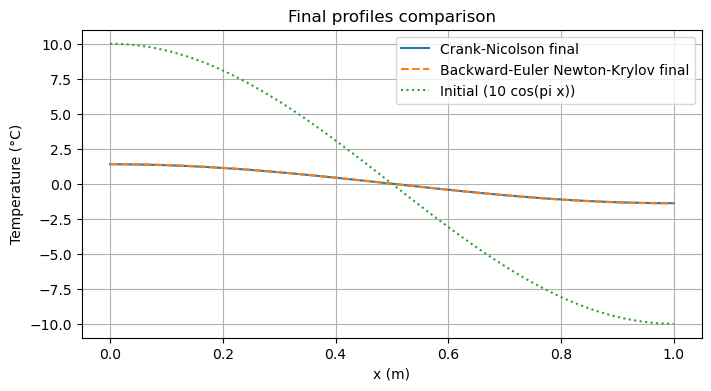

Timing summary: Crank-Nicolson = 0.0049 s, Backward-Euler Newton-Krylov = 69.7590 s


In [6]:
# Hybrid solver: Crank-Nicolson (fast, sparse) + Backward-Euler Newton-Krylov (matrix-free Jv via num_dual)

import numpy as np
import time
from scipy.sparse import diags, eye
from scipy.sparse.linalg import factorized, LinearOperator, gmres
from num_dual import first_derivative
import plotly.graph_objects as go
import matplotlib.pyplot as plt

# -----------------------
# PARAMETERS (edit if you like)
# -----------------------
alpha = 1.0     # thermal diffusivity
L = 1.0         # domain length (m)
N = 100         # number of grid points including endpoints
dx = L / (N - 1)
x = np.linspace(0.0, L, N)

dt = 1e-3       # time step
t_final = 0.2   # final time
nt = int(np.ceil(t_final / dt))
t_grid = np.linspace(0.0, dt*nt, nt+1)

# initial condition: 10*cos(pi x) (Neumann-compliant)
u0 = 10.0 * np.cos(np.pi * x)

# -----------------------
# Sparse Laplacian for CN (float, fast)
# -----------------------
main = -2.0 * np.ones(N)
off  = 1.0  * np.ones(N-1)
Lmat_sparse = diags([main, off, off], [0, -1, 1], shape=(N, N)).tolil()
# Neumann adjustments (ghost-mirror)
Lmat_sparse[0, 0]  = -2.0
Lmat_sparse[0, 1]  =  2.0
Lmat_sparse[-1, -1] = -2.0
Lmat_sparse[-1, -2] =  2.0
Lmat_sparse = (Lmat_sparse / (dx**2)).tocsr()

# -----------------------
# Crank-Nicolson setup (fast with sparse factorization)
# -----------------------
I_sp = eye(N, format='csr')
theta = 0.5
A_cn = (I_sp - theta * dt * alpha * Lmat_sparse).tocsc()
B_cn = (I_sp + (1.0 - theta) * dt * alpha * Lmat_sparse).tocsr()
solve_Acn = factorized(A_cn)

def crank_nicolson(u_init, Bcn, solveA, nt):
    u = u_init.copy()
    U = np.zeros((nt+1, N))
    U[0, :] = u
    for n in range(1, nt+1):
        rhs = Bcn.dot(u)
        u = solveA(rhs)
        U[n, :] = u
    return U

# -----------------------
# Pure-Python Laplacian (works with floats AND num_dual DualNumbers)
# returns a numpy array; dtype=float for floats, dtype=object for Duals
# -----------------------
def laplacian_neumann_pure(u, dx):
    # u can be numpy array of floats or array-like of DualNumbers
    Nloc = len(u)
    # Use a Python list to allow arbitrary element types (Dual, float)
    out = [0]*Nloc
    # left boundary: (2*u1 - 2*u0) / dx^2  (mirror ghost)
    out[0] = (2 * u[1] - 2 * u[0]) / (dx**2)
    # interior
    for i in range(1, Nloc-1):
        out[i] = (u[i+1] - 2 * u[i] + u[i-1]) / (dx**2)
    # right boundary
    out[-1] = (2 * u[-2] - 2 * u[-1]) / (dx**2)
    # return numpy array: object dtype if elements are Dual; float dtype if floats
    return np.array(out, dtype=object if not isinstance(out[0], (float, int)) else float)

# Residual for Backward-Euler (works with u numeric or u containing DualNumbers)
def residual_BE_pure(u, u_old, dt, alpha, dx):
    # u may be array-like of DualNumbers when used inside directional derivative
    lap = laplacian_neumann_pure(u, dx)
    return u - u_old - dt * alpha * lap

# -----------------------
# Jv via num_dual directional derivative (component-wise)
# For vector v, computes J(u) * v by computing derivative of scalar functions g_i(s) = F_i(u + s v)
# This implementation calls first_derivative N times per matvec (simple & robust)
# -----------------------
def Jv_via_num_dual(u_float, v_float, u_old_float, dt, alpha, dx):
    """
    u_float, v_float, u_old_float are numpy arrays of floats (not Duals).
    Returns J*v as numpy float array.
    """
    Nloc = len(u_float)
    Jv = np.zeros(Nloc, dtype=float)
    # For each component i, define g_i(s) = F_i(u + s v) and compute g_i'(0)
    # Note: first_derivative expects a scalar-returning function of a scalar input s.
    for i in range(Nloc):
        def g_i(s, i=i):
            # s may be a Dual scalar; then u_plus becomes array of Duals
            u_plus = u_float + s * v_float
            f_plus = residual_BE_pure(u_plus, u_old_float, dt, alpha, dx)
            return f_plus[i]
        # first_derivative returns (value_at_0, derivative_at_0)
        _, deriv = first_derivative(g_i, 0.0)
        Jv[i] = deriv
    return Jv

# Newton-Krylov step: solve F(u)=0 where F = u - u_old - dt*alpha*laplacian(u)
def newton_krylov_step_pure(u_old, dt, alpha, dx, tol_newton=1e-10, rtol_gmres=1e-8, max_newton_it=20):
    """
    Matrix-free Newton-Krylov using Jv computed by Jv_via_num_dual.
    u_old is numpy float array initial guess (and previous timestep solution).
    """
    u = u_old.copy()
    Nloc = len(u)
    for k in range(max_newton_it):
        Fval = residual_BE_pure(u, u_old, dt, alpha, dx)   # numeric residual (float array)
        normF = np.linalg.norm(Fval)
        if normF < tol_newton:
            return u, k
        # matvec: J(u) dot v
        def matvec(v):
            return Jv_via_num_dual(u, v, u_old, dt, alpha, dx)
        J_op = LinearOperator((Nloc, Nloc), matvec=matvec, dtype=float)
        # solve J delta = -Fval with GMRES (matrix-free)
        delta, info = gmres(J_op, -Fval, rtol=rtol_gmres, atol=1e-14, restart=50, maxiter=500)
        if info != 0:
            print(f"  gmres info = {info} (continuing with returned approximate delta)")
        u = u + delta
        if np.linalg.norm(delta) < 1e-12:
            return u, k+1
    return u, max_newton_it

def backward_euler_newton_krylov_pure(u_init, dt, alpha, dx, nt):
    U = np.zeros((nt+1, N))
    U[0, :] = u_init.copy()
    u_old = u_init.copy()
    tot_newton = 0
    for n in range(1, nt+1):
        u_new, nit = newton_krylov_step_pure(u_old, dt, alpha, dx)
        tot_newton += nit
        U[n, :] = u_new
        u_old = u_new
    return U, tot_newton

# -----------------------
# Run both methods, time them
# -----------------------
print("Running Crank-Nicolson (sparse factorized)...")
t0 = time.perf_counter()
U_cn = crank_nicolson(u0, B_cn, solve_Acn, nt)
t_cn = time.perf_counter() - t0
print(f"  Crank-Nicolson done in {t_cn:.4f} s")

print("Running Backward-Euler Newton-Krylov with num_dual Jv (pure-Python laplacian)...")
t0 = time.perf_counter()
U_nk, total_newton_iters = backward_euler_newton_krylov_pure(u0, dt, alpha, dx, nt)
t_nk = time.perf_counter() - t0
print(f"  Backward-Euler Newton-Krylov done in {t_nk:.4f} s, total Newton iters = {total_newton_iters}")

# -----------------------
# Sanity checks: mean conservation (Neumann BC) and quick comparisons
# -----------------------
mean_initial = np.mean(u0)
mean_cn = np.mean(U_cn[-1,:])
mean_nk = np.mean(U_nk[-1,:])
print(f"Mean initial: {mean_initial:.12e}, CN final mean: {mean_cn:.12e}, NK final mean: {mean_nk:.12e}")

# -----------------------
# Plot (Plotly surface for CN result by default)
# -----------------------
Z = U_cn   # swap to U_nk to show Newton-Krylov surface instead
X_grid, T_grid = np.meshgrid(x, t_grid)

fig = go.Figure(data=[go.Surface(x=X_grid, y=T_grid, z=Z,
                                 contours={"z": {"show": True}})])
fig.update_layout(title=f"Crank-Nicolson solution (x,t,T)  — timings: CN={t_cn:.4f}s  NK={t_nk:.4f}s",
                  scene=dict(xaxis_title='x (m)', yaxis_title='t (s)', zaxis_title='Temperature (°C)'),
                  width=900, height=600)
fig.show()

# Matplotlib final-profile comparison
plt.figure(figsize=(8,4))
plt.plot(x, U_cn[-1,:], label='Crank-Nicolson final')
plt.plot(x, U_nk[-1,:], '--', label='Backward-Euler Newton-Krylov final')
plt.plot(x, u0, ':', label='Initial (10 cos(pi x))')
plt.legend()
plt.xlabel('x (m)')
plt.ylabel('Temperature (°C)')
plt.title('Final profiles comparison')
plt.grid(True)
plt.show()

print(f"Timing summary: Crank-Nicolson = {t_cn:.4f} s, Backward-Euler Newton-Krylov = {t_nk:.4f} s")


## **Applications of Dual Numbers**
Dual numbers and their straightforward implementation of AD is quite useful, but clearly not the ideal tool for everything. We use them for low-dimensional functions, small ODEs, complex Jacobian/Hessian calculations, optimization, and simple Machine Learning, where the slow speed of forward-mode AD doesn't really impact the neural network all that much.

## **Disadvantages of Dual Numbers and Forward-Mode AD**
As great as dual numbers are, there are a number of situations where they *suck*, especially in places where you don't need things like the Jacobian.

| Domain                          | Dual Numbers?   | Why                                      |
| ------------------------------- | --------------- | ---------------------------------------- |
| **Scalar/Low-Dim Functions**    | Excellent | Exact AD, trivial to implement           |
| **Geometry/Kinematics**         | Excellent | Analytic Jacobians without algebra       |
| **Small/Medium ODE systems**    | Great      | Sensitivities with almost no extra code  |
| **Optimization**                | Great      | Exact gradients and Hessians             |
| **Machine Learning primitives** | Useful      | When not using reverse-mode AD           |
| **Large PDEs**                  | Awful         | Cost scales with dimension; not feasible |
| **Implicit PDE solvers**        | Very bad      | Requires Jv repeatedly in dual space     |
| **Crank–Nicolson, BE, IRK**     | Very slow     | Newton + large Jacobians → explosion     |

Forward-mode AD is also slightly slower, because you need to *seed* different $\epsilon$ for different derivatives, eventually finding the larger derivative if your function is complex. When your number of outputs is larger than your inputs, forward-mode AD is great.

Another technique called **reverse-mode AD**, which takes more memory, provides much more efficient gradients and is great for parameter sweeps, which makes it **INCREDIBLY** important in Machine Learning and neural networks.

DN are also quite tedious and limiting in Python; implementing them in a language such as Java or Rust could be easier (and most of the libraries are written in those languages, anyways).

---

<a name='appendix_a'></a>
# **Appendix A: Derivation of Dual Number AD Rules**
Most of these rules are going to be derived with the Taylor series, as this is how Dual Numbers are motivated!
## **Polynomials**
Consider a quadratic function
$$ f(x) = x^2$$
We substitute in the dual numbers, so
$$
\begin{align*}
f(a + b \epsilon) &= a^2 + 2 ab \epsilon + b^2\epsilon^2 \\
&= a^2 + 2 ab \epsilon
\end{align*}
$$
Which is actually in the form $f(a)+f'(a)b\epsilon$. Now consider higher degrees,
$$
\begin{align*}
(a + b \epsilon)^3 &= (a^2 + 2 ab \epsilon)(a + b \epsilon) \\
&= a^3 + a^2 b \epsilon + 2a^2b\epsilon + 2b^2 \epsilon^2 \\
&= a^3 + 3a^2 b \epsilon \\
(a + b \epsilon)^4 &= (a^3 + 3a^2 b \epsilon)(a + b \epsilon) \\
&= a^4 + a^3 b \epsilon + 3 a^3 b \epsilon + 3 a^2 b^2 \epsilon^2 \\
&=a^4 + 4a^3 b \epsilon \\
&\cdots & \\
(a+b\epsilon)^n &= a^n + na^{n-1} b \epsilon
\end{align*}
$$
and for any polynomial $p$, we have
$$
p(a+b\epsilon)=p(a)+p'(a)b\epsilon
$$

We can show this is also true for non-integers using the general binomial theorem,
$$
(a+b\epsilon)^n = \sum_{k=0}^n {n\choose{k}} a^{n-k} (b\epsilon)^k, {n\choose{k}} = \frac{n!}{k!(n-k)!}
$$
where the higher order terms $\epsilon$ disappear by definition, so we have

$$
\begin{align*}
(a+b\epsilon)^n &= \sum_{k=0}^n {n\choose{k}} a^{n-k} (b\epsilon)^k \\
&= a^n + \frac{n!}{1!(n-1)!} a^{n-1} b\epsilon + \underbrace{\frac{n!}{2!(n-2)!} a^{n-2} b^2 \epsilon^2 + \cdots}_\text{goes to zero} \\
&= a^n + n a^{n-1} b \epsilon
\end{align*}
$$
## **Trigonometric Functions**
Consider $\sin x$ and its input addition formula $\sin(x+y)$:
$$
\begin{align*}
\sin(a + b \epsilon) &= \sin(a) \cos(b \epsilon) + \cos(a) \sin(b \epsilon) \\
\end{align*}
$$
Now note the Taylor expansions of sine and cosine, and evaluate them for the input $\epsilon$:
$$
\begin{align*}
\sin (b\epsilon) &= b\epsilon - \frac{b^3\epsilon^3}{3!} + \frac{b^5\epsilon^5}{5!} - \cdots \\
&= b\epsilon \\
\cos (b\epsilon) &= 1 - \frac{b^2\epsilon^2}{2!} + \frac{b^4\epsilon^4}{4!} - \cdots \\
&= 1
\end{align*}
$$
so we have
$$
\begin{align*}
\sin(a + b \epsilon) &= \sin(a) \cos(b \epsilon) + \cos(a) \sin(b \epsilon) \\
&= \sin(a) + b \epsilon \cos(a)
\end{align*}
$$

Similarly, for $\cos x$,
$$
\begin{align*}
\cos(a + b \epsilon) &= \cos(a) \cos(b\epsilon) - \sin(a) \sin(b\epsilon) \\
&= \cos(a) - b\epsilon \sin(a)
\end{align*}
$$

And for $\tan x$, we have
$$
\tan(b\epsilon) = \frac{\sin b\epsilon}{\cos b\epsilon} = b\epsilon
$$
so
$$
\begin{align*}
\tan(a + b \epsilon) &= \frac{\tan(a) + \tan(b\epsilon)}{1 - \tan(a) \tan(b\epsilon)} \\
&= \frac{\tan(a) + b \epsilon}{1 - \tan(a) b \epsilon} \\
&= \frac{\tan(a) + b \epsilon}{1 - \tan(a) b \epsilon} \frac{1 + \tan(a) b \epsilon} {1 + \tan(a) b \epsilon} \\
&= \frac{(\tan(a) + b \epsilon)(1 + \tan(a) b \epsilon)}{1 - \tan^2(a) b^2 \epsilon^2} \\
&= \tan(a) + \tan^2(a) b \epsilon + b \epsilon + \tan(a) b^2 \epsilon^2 \\
&= \tan(a) + (\tan^2(a) + 1) b \epsilon \\
&= \tan(a) + \sec^2(a) b \epsilon
\end{align*}
$$

## **Exponential Functions**
Consider $e^x$:
$$
\begin{align*}
e^{a+b\epsilon} &= e^a e^{b\epsilon}
\end{align*}
$$
and the Taylor expansion of $e^x$:
$$e^{b\epsilon} = \sum_{k=0}^\infty \frac{(b\epsilon)^k}{k!} = 1 + \frac{b\epsilon}{1!} + \frac{(b\epsilon)^2}{2!} + \cdots = 1 + b\epsilon$$
so we have
$$
\begin{align*}
e^{a+b\epsilon} &= e^a e^{b\epsilon} \\
&= e^a (1 + b \epsilon) \\
&= e^a + e^a b \epsilon
\end{align*}
$$

## **Logarithmic and Absolute Functions**
Consider $\ln x$:
$$
\ln(a + b \epsilon)
$$
There isn't an easy way to reduce this, so by the definition of dual numbers and Taylor series,
$$
\ln(a + b \epsilon) = \ln(a) + \frac{1}{a} b\epsilon - \frac{1}{a^2} b^2 \epsilon^2 + \cdots
$$
Consider $|x|$, whose derivative is the function $\text{sgn}(x)$:
$$
|a + b \epsilon| = |a| + b \epsilon \text{ sgn } x + 0 + \cdots
$$

<a name='appendix_b'></a>
# **Appendix B: Averaged Speed of Methods**
This considers the same function
$$
f(x) = \frac{e^x}{\sqrt{\sin^3(x) + \cos^3(x)}}
$$
but runs each method a large amount of times (20000, exactly) to get an average speed.

The second cell uses the more accurate ```timeit``` function!

In [7]:
import num_dual as nd
import numpy as np
import sympy as sp
import time

# ============================================================
# 1. Define functions (analytical)
# ============================================================
def f(x):
    return np.exp(x) / np.sqrt(np.sin(x)**3 + np.cos(x)**3)

def f_prime(x):
    num = np.exp(x) * (
        2*np.sin(x)**3
        - 3*np.cos(x)*np.sin(x)**2
        + 3*np.cos(x)**2*np.sin(x)
        + 2*np.cos(x)**3
    )
    den = 2 * (np.sin(x)**3 + np.cos(x)**3)**(1.5)
    return num / den

def f_double_prime(x):
    num = np.exp(x) * (
        10*np.sin(x)**6
        - 24*np.cos(x)*np.sin(x)**5
        + 27*np.cos(x)**2*np.sin(x)**4
        - 34*np.cos(x)**3*np.sin(x)**3
        + 3*np.cos(x)**4*np.sin(x)**2
        + 10*np.cos(x)**6
    )
    den = 4 * (np.sin(x)**3 + np.cos(x)**3)**(2.5)
    return num / den

# ============================================================
# 2. High-resolution timing helper
# ============================================================
def run_timed(func, repeats=1000):
    start = time.perf_counter()
    for _ in range(repeats):
        func()
    end = time.perf_counter()
    return (end - start) / repeats

# ============================================================
# 3. Define evaluation methods
# ============================================================
x_val = 1.5
h = 1e-6

# Analytical evaluation
def analytical_eval():
    f(x_val)
    f_prime(x_val)
    f_double_prime(x_val)

# NumDual evaluation
def numdual_eval():
    nd.second_derivative(f, x_val)

# Central difference evaluation
def central_diff_eval():
    f(x_val)
    (f(x_val + h) - f(x_val - h)) / (2*h)
    (f(x_val + h) - 2*f(x_val) + f(x_val - h)) / (h*h)

# Symbolic (compute derivatives once)
x = sp.symbols("x")
f_sym = sp.exp(x) / sp.sqrt(sp.sin(x)**3 + sp.cos(x)**3)
f_prime_sym = sp.diff(f_sym, x)
f_double_prime_sym = sp.diff(f_prime_sym, x)

# Lambdify numeric functions
f_l = sp.lambdify(x, f_sym, "numpy")
fp_l = sp.lambdify(x, f_prime_sym, "numpy")
fpp_l = sp.lambdify(x, f_double_prime_sym, "numpy")

def symbolic_eval():
    f_l(x_val)
    fp_l(x_val)
    fpp_l(x_val)

# ============================================================
# 4. Benchmarking of all methods
# ============================================================
methods = {
    "Analytical": analytical_eval,
    "NumDual": numdual_eval,
    "Central Diff": central_diff_eval,
    "Symbolic": symbolic_eval
}

repeats = 20000
results = {name: run_timed(fn, repeats) for name, fn in methods.items()}

# ============================================================
# 5. Print Results
# ============================================================
print("Average execution time per evaluation:\n")
for name, t in results.items():
    print(f"{name:20s}: {t*1e6:10.3f} μs")

# ============================================================
# 6. Compute actual numerical values for reporting
# ============================================================
# Analytical values
f_val = f(x_val)
df_val = f_prime(x_val)
d2f_val = f_double_prime(x_val)

# NumDual values
f_val_nd, df_val_nd, d2f_val_nd = nd.second_derivative(f, x_val)

# Central difference values
f_val_cd = f(x_val)
df_val_cd = (f(x_val + h) - f(x_val - h)) / (2*h)
d2f_val_cd = (f(x_val + h) - 2*f(x_val) + f(x_val - h)) / (h*h)

# Symbolic numerical values
f_val_sym = f_l(x_val)
df_val_sym = fp_l(x_val)
d2f_val_sym = fpp_l(x_val)

# Report values
print("\n====================  FUNCTION VALUE COMPARISON  ====================\n")

print("Method\t\t\tf(x)\t\tf'(x)\t\tf''(x)")
print("---------------------------------------------------------------------")

print(f"Analytical\t\t{f_val:.10f}\t{df_val:.10f}\t{d2f_val:.10f}")
print(f"NumDual\t\t\t{f_val_nd:.10f}\t{df_val_nd:.10f}\t{d2f_val_nd:.10f}")
print(f"Central Diff\t\t{f_val_cd:.10f}\t{df_val_cd:.10f}\t{d2f_val_cd:.10f}")
print(f"Symbolic\t\t{f_val_sym:.10f}\t{df_val_sym:.10f}\t{d2f_val_sym:.10f}")

print("=====================================================================\n")

Average execution time per evaluation:

Analytical          :     25.047 μs
NumDual             :     19.535 μs
Central Diff        :     19.641 μs
Symbolic            :     35.164 μs

====================  FUNCTION VALUE COMPARISON  ====================

Method			f(x)		f'(x)		f''(x)
---------------------------------------------------------------------
Analytical		4.4977800539	4.0534278939	9.4630736816
NumDual			4.4977800539	4.0534278939	9.4630736816
Central Diff		4.4977800539	4.0534278933	9.4653174187
Symbolic		4.4977800539	4.0534278939	9.4630736816



In [8]:
import numpy as np
import num_dual as nd
import sympy as sp
import pandas as pd
import timeit

# -------------------------------
# Function and derivatives
# -------------------------------
def f(x):
    return np.exp(x) / np.sqrt(np.sin(x)**3 + np.cos(x)**3)

def f_prime(x):
    num = np.exp(x) * (2*np.sin(x)**3 - 3*np.cos(x)*np.sin(x)**2
                        + 3*np.cos(x)**2*np.sin(x) + 2*np.cos(x)**3)
    den = 2 * (np.sin(x)**3 + np.cos(x)**3)**(1.5)
    return num / den

def f_double_prime(x):
    num = np.exp(x) * (10*np.sin(x)**6 - 24*np.cos(x)*np.sin(x)**5
                        + 27*np.cos(x)**2*np.sin(x)**4 - 34*np.cos(x)**3*np.sin(x)**3
                        + 3*np.cos(x)**4*np.sin(x)**2 + 10*np.cos(x)**6)
    den = 4 * (np.sin(x)**3 + np.cos(x)**3)**(2.5)
    return num / den

def central_diff(x, h=1e-6):
    f0 = f(x)
    fp = (f(x+h) - f(x-h)) / (2*h)
    fpp = (f(x+h) - 2*f(x) + f(x-h)) / (h*h)
    return f0, fp, fpp

# Dual numbers
# nd.second_derivative already exists in num_dual
x_val = 1.5

# Symbolic
x = sp.symbols('x')
f_sym_expr = sp.exp(x)/sp.sqrt(sp.sin(x)**3 + sp.cos(x)**3)
f_prime_sym_expr = sp.diff(f_sym_expr, x)
f_double_prime_sym_expr = sp.diff(f_prime_sym_expr, x)

f_sym = sp.lambdify(x, f_sym_expr, "numpy")
fp_sym = sp.lambdify(x, f_prime_sym_expr, "numpy")
fpp_sym = sp.lambdify(x, f_double_prime_sym_expr, "numpy")

# -------------------------------
# Compute values
# -------------------------------
f_val = f(x_val)
df_val = f_prime(x_val)
d2f_val = f_double_prime(x_val)

f_val_cd, df_val_cd, d2f_val_cd = central_diff(x_val)
f_val_nd, df_val_nd, d2f_val_nd = nd.second_derivative(f, x_val)
f_val_sym = f_sym(x_val)
df_val_sym = fp_sym(x_val)
d2f_val_sym = fpp_sym(x_val)

# -------------------------------
# Benchmarking using timeit
# -------------------------------
def benchmark(stmt, setup='pass', number=1000):
    return timeit.timeit(stmt, setup=setup, number=number)/number

times = {}
times["Analytical"] = benchmark('f(x_val); f_prime(x_val); f_double_prime(x_val)',
                                'from __main__ import f, f_prime, f_double_prime, x_val')
times["Central Diff"] = benchmark('central_diff(x_val)',
                                  'from __main__ import central_diff, x_val, f')
times["NumDual"] = benchmark('nd.second_derivative(f, x_val)',
                             'from __main__ import nd, f, x_val')
times["Symbolic"] = benchmark('f_sym(x_val); fp_sym(x_val); fpp_sym(x_val)',
                              'from __main__ import f_sym, fp_sym, fpp_sym, x_val')

# -------------------------------
# Create a DataFrame for results
# -------------------------------
df = pd.DataFrame({
    "Method": ["Analytical", "Central Diff", "NumDual", "Symbolic"],
    "f(x)": [f_val, f_val_cd, f_val_nd, f_val_sym],
    "f'(x)": [df_val, df_val_cd, df_val_nd, df_val_sym],
    "f''(x)": [d2f_val, d2f_val_cd, d2f_val_nd, d2f_val_sym],
    "Avg Time (s)": [times["Analytical"], times["Central Diff"], times["NumDual"], times["Symbolic"]]
})

pd.set_option('display.float_format', '{:.10f}'.format)
print("\n================ FUNCTION VALUES AND AVERAGE TIMES ================\n")
print(df.to_string(index=False))
print("=====================================================================\n")



================ FUNCTION VALUES AND AVERAGE TIMES ================

      Method         f(x)        f'(x)       f''(x)  Avg Time (s)
  Analytical 4.4977800539 4.0534278939 9.4630736816  0.0000212158
Central Diff 4.4977800539 4.0534278933 9.4653174187  0.0000192769
     NumDual 4.4977800539 4.0534278939 9.4630736816  0.0000186392
    Symbolic 4.4977800539 4.0534278939 9.4630736816  0.0000357162

